In [1]:
using DifferentialEquations
using Plots
using DataFrames


In [2]:
function light_scatter(L, I0, α, β, X)
    
    z = [0;
         collect(1:10) / 10 * L]
    
    I = I0 * exp.( - ( α * X + β ) .* z)
    j = 0
    μM = 0

    for intensity in I
        
        if (j == 0) || (j == 0)
            ax =     intensity / (intensity + ks + intensity^2/ki)
        else
            ax = 2 * intensity / (intensity + ks + intensity^2/ki)
        end
        
    j += 1    
    μM += ax
    
    end
    
    return μM
end  
    
function FAME(dx, x, p, t)
    
    # extract params
    
    I0, α, β, μM0, μN, μd, ϵ, γ, ki, kq, kN, ks, θ  = p  
    BM, N, q, f = x  
    
    # calc light scattering
    
    μM = μM0 / 20 * light_scatter(0.044, I0, α, β, BM)
    μ0 = μM * ( 1 - kq/x[3])
      
    # dynamic eqs
    
    dx[1] =  x[1] * (μ0-μd)                                       # dXdt = X(u0-ud)
    dx[2] = -μN * x[1] * x[2]/(x[2]+kN)                           # dNdt = -uN N/(N+kN)X
    dx[3] =  μN * x[2]/(x[2]+kN) - μM * ( 1-kq/x[3]) * x[3]       # dqdt = uN N/N+kN -um(I)(1-kq/q)*q
    dx[4] =  μ0 * (θ*x[3]-ϵ*x[4]) - γ * μN * x[2]/(x[2]+kN)       # dfdt = um(I) ( theata*q-eps*f)(1-kq/q) - 
                                                                  #        gamma uN N/N+k
    
end


FAME (generic function with 1 method)

___
___


#### Initial Conditions:

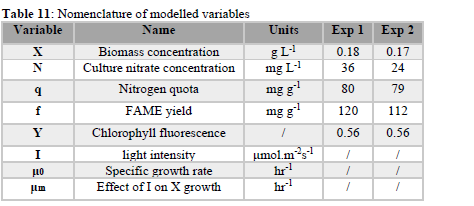




#### Optimal Params

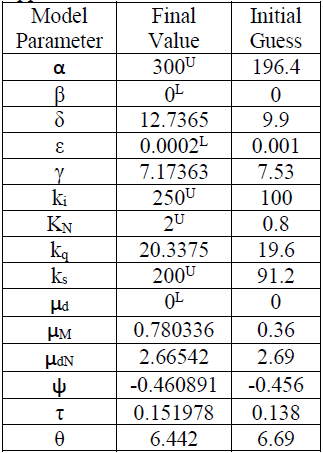

In [3]:
I0 = 160
α = 196.4
β = 0
μM0 = 0.359
μN = 2.6654
μd = 0
ϵ = 0.01
γ = 7.17
ki = 100
kq = 20.3375
kN = 2.6645
ks = 91.2
θ = 6.69
p = [I0; α; β; μM0; μN; μd; ϵ; γ; ki; kq; kN; ks; θ]


    
x0 = [.18; 36; 80; 120]

tspan = (0.0,200.0)

prob = ODEProblem(FAME,x0,tspan, p)
sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 174-element Array{Float64,1}:
   0.0
   0.015170908483963843
   0.14101136603268377
   0.375056287952255
   0.6605715246019843
   1.0156237786357496
   1.4301515410666479
   1.9091423805885968
   2.447616424014315
   3.0460156316366143
   3.70197028885489
   4.415395151854003
   5.185998635956958
   ⋮
 183.3895530537191
 184.9479374777909
 186.5032257856688
 188.05549738398432
 189.60482847915338
 191.15129313171428
 192.69496287151648
 194.2359073342723
 195.77419367148215
 197.3098869799932
 198.84305062593427
 200.0
u: 174-element Array{Array{Float64,1},1}:
 [0.18, 36.0, 80.0, 120.0]
 [0.18024065351236587, 35.99321852825148, 79.93081023066811, 120.44320146456889]
 [0.1822434125145904, 35.93662064681853, 79.36297479078176, 124.0786156477674]
 [0.18599906087294896, 35.82970276911924, 78.33532686938446, 130.6488593328491]
 [0.19063368262897426, 35.69633204796897, 77.13048265793307, 138.33620261350757]
 [0.196

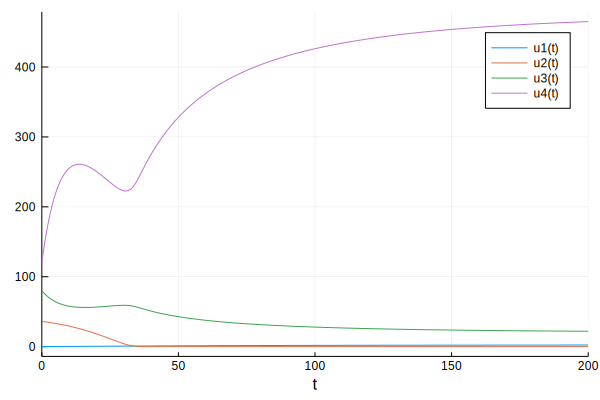

In [4]:
plot(sol)

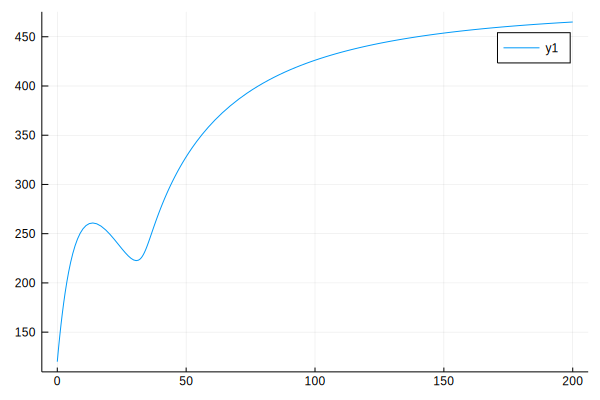

In [5]:
res_frame = DataFrame( Time = sol.t[:],
                       Biomass = sol[1,:],
                       Nitrate = sol[2,:],
                       N_quota = sol[3,:],
                       FAME_yield = sol[4,:])

plot(res_frame[!,"Time"], res_frame[!, "FAME_yield"])

In [6]:
z = collect(1:10)/10 * 0.44
z*1

10-element Array{Float64,1}:
 0.044000000000000004
 0.08800000000000001
 0.132
 0.17600000000000002
 0.22
 0.264
 0.308
 0.35200000000000004
 0.396
 0.44

In [7]:
using Distributions

In [8]:
function prob_func(prob,i,repeat)
  noise = (1. .- randn(13)*0.1)
  p_new = p.*noise
  remake(prob,p=p_new)
end

prob_func (generic function with 1 method)

In [ ]:
ensemble_prob = EnsembleProblem(prob,prob_func=prob_func)
sim = solve(ensemble_prob,Tsit5(),trajectories=50)


In [ ]:
plotly()
plot(sim,linealpha=0.6,color=:blue,vars=(0,2),title="Phase Space Plot")
plot!(sim,linealpha=0.6,color=:red,vars=(0,3),title="Phase Space Plot")
plot!(sim,linealpha=0.6,color=:red,vars=(0,4),title="Phase Space Plot")

In [ ]:
summ = EnsembleSummary(sim[1,:],0:1:50)

plot(summ, fillalpha=0.5, label="Biomass")

In [ ]:
summ[1,:]